# Analyzing Brazilian Content on Netflix

## Introduction
In this project, I will explore the Netflix Movies and TV Shows dataset curated by Kaggle. I downloaded the dataset and saved it as "netflix_titles.csv". Several research questions (RQ) have arisen as I analyzed this dataset:

1. What type of content has Brazil produced the most or been involved in producing for Netflix?

2. What is the progression of Brazilian content production over time?

3. What kind of movies has Brazil produced the most?

4. What is the progression of Brazilian movie production over time?

5. What kind of TV shows has Brazil produced the most?

6. What is the progression of Brazilian TV shows production over time?

7. Which age rating (content rating) has Brazil focused on the most?

8. Is there a relationship between the release year and content rating?

9. Is there a relationship between the release year and the duration of a movie?

10. Do Brazilian TV shows tend to get renewed?

### Importing Packages

It is possible to obtain the dataset by importing Kaggle or by using kaggle_username and kaggle_key through os.environ. In my case, I used the second option, but it is necessary to generate a key for this.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
#import kaggle

# os.environ['KAGGLE_USERNAME'] = 'kaggle username'
# os.environ['KAGGLE_KEY'] = 'kaggle key'

## Data Wrangling

Imported the dataset from kaggle server, and extracted the .zip using the zipfile package.

In [ ]:

!kaggle datasets download -d shivamb/netflix-shows

zipfile_name = 'netflix-shows.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

### General Properties
Renamed the dataset from 'netflix-shows' to 'netflix-titles' to avoid potential ambiguity due to the presence of the 'type' column, which contains values 'TV Shows' and 'Movies'.

Print out the first few rows using `.head()` . 

In [3]:
raw_data = pd.read_csv('netflix_titles.csv')
raw_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Utilized `.shape` to assess the number of rows and columns.

In [4]:
raw_data.shape

(8807, 12)

While examining the table, it became evident that certain entries within the 'country' column were presented in a list format rather than as unique values. However, this is not an issue since the goal is to focus on the content produced **exclusively** by Brazil.

In [5]:
raw_data['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

There are a total of 77 unique entries containing 'Brazil' in the 'country' column.

In [6]:
raw_data.query('country == "Brazil"').shape

(77, 12)

### Creating the Brazil dataset

Our next step is to generate a new table specifically by using a `.query` where `country == 'Brazil'`.

Print out the first few rows using `.head()` . 



In [7]:
data_brazil = raw_data.query('country == "Brazil"')
data_brazil = data_brazil.reset_index(drop=True)

data_brazil.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,"Documentaries, International Movies","A decade after the seminal Brazilian film ""Cit..."
1,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,"Dramas, International Movies",A disillusioned psychologist tries to commit s...
2,s784,Movie,Carnaval,Leandro Neri,"Giovana Cordeiro, Gkay, Bruna Inocencio, Samya...",Brazil,"June 2, 2021",2021,TV-MA,95 min,"Comedies, International Movies, Music & Musicals","After a breakup, an influencer takes her frien..."
3,s967,Movie,Get the Grift,Pedro Antonio,"Marcus Majella, Samantha Schmütz, Caito Mainie...",Brazil,"April 28, 2021",2021,TV-MA,95 min,"Comedies, International Movies","After a botched scam, Clóvis bumps into Lohane..."
4,s1189,Movie,Get the Goat,Vitor Brandt,"Matheus Nachtergaele, Edmilson Filho, Letícia ...",Brazil,"March 18, 2021",2021,TV-14,98 min,"Action & Adventure, Comedies, International Mo...",Two hapless cops find themselves in over their...


Upon reviewing the 'type' column, it's evident that it contains only two distinct values: 'TV Shows' and 'Movies'.

In [8]:
data_brazil['type'].value_counts()

Movie      50
TV Show    27
Name: type, dtype: int64

Moreover, within the 'listed_in' column, the entries are formatted as lists rather than unique values. This poses an issue since we require unique entries for effective analysis.

In [9]:
data_brazil['listed_in'].value_counts()

Stand-Up Comedy                                                      9
Documentaries, International Movies                                  5
Crime TV Shows, International TV Shows, TV Dramas                    5
Comedies, International Movies                                       4
Dramas, International Movies                                         4
Comedies, Dramas, International Movies                               3
International TV Shows, TV Comedies                                  3
Dramas, Faith & Spirituality, International Movies                   3
Children & Family Movies, Comedies, Music & Musicals                 3
International TV Shows, TV Dramas, TV Mysteries                      2
Documentaries, International Movies, Sports Movies                   2
Action & Adventure, International Movies                             2
Children & Family Movies                                             2
Kids' TV                                                             2
Comedi

### Spliting the listed_in column

To overcome the challegente in the listed_in column, I will split the lists into single values, creating new rows accordingly. This transformation will allow us to conduct a more granular examination of the content categories.

First of all, I created a copy named "brazil_split".

In [10]:
brazil_split = data_brazil.copy()

The next step involves splitting the lists in the 'listed_in' column into individual values, each placed in a new row.

In [11]:
brazil_split['listed_in'] = brazil_split['listed_in'].str.split(', ')

brazil_split = brazil_split.explode('listed_in')


Print out the first few rows of the new dataset using `.head()` . 

The 'listed_in' column now contains only individual values.

In [12]:
brazil_split.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,Documentaries,"A decade after the seminal Brazilian film ""Cit..."
0,s303,Movie,City of God: 10 Years Later,"Cavi Borges, Luciano Vidigal",NaN,Brazil,"August 5, 2021",2013,TV-MA,69 min,International Movies,"A decade after the seminal Brazilian film ""Cit..."
1,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,Dramas,A disillusioned psychologist tries to commit s...
1,s651,Movie,O Vendedor de Sonhos,Jayme Monjardim,"César Troncoso, Dan Stulbach, Thiago Mendonça,...",Brazil,"June 22, 2021",2016,TV-14,96 min,International Movies,A disillusioned psychologist tries to commit s...
2,s784,Movie,Carnaval,Leandro Neri,"Giovana Cordeiro, Gkay, Bruna Inocencio, Samya...",Brazil,"June 2, 2021",2021,TV-MA,95 min,Comedies,"After a breakup, an influencer takes her frien..."


### Final adjustments.

I took care to ensure that the 'release_year' column is in numeric format and not as a string.

In [13]:
brazil_split['release_year'] = pd.to_numeric(brazil_split['release_year'], errors='coerce')

Checking the count for each value in the 'listed_in' column.

In [14]:
brazil_split['listed_in'].value_counts()

International Movies            33
International TV Shows          25
Comedies                        19
Dramas                          14
TV Dramas                       11
Documentaries                    9
Stand-Up Comedy                  9
Children & Family Movies         7
Crime TV Shows                   6
TV Comedies                      5
TV Mysteries                     5
Docuseries                       5
Music & Musicals                 5
Action & Adventure               4
Reality TV                       3
LGBTQ Movies                     3
Faith & Spirituality             3
TV Sci-Fi & Fantasy              2
Science & Nature TV              2
Romantic TV Shows                2
TV Horror                        2
Romantic Movies                  2
Kids' TV                         2
Independent Movies               2
Sports Movies                    2
Stand-Up Comedy & Talk Shows     1
Name: listed_in, dtype: int64

The values 'International Movies' and 'International TV Shows' are redundant, so we will drop them.

In [15]:
values_to_drop = ['International Movies','International TV Shows']

brazil_split = brazil_split.loc[~brazil_split['listed_in'].isin(values_to_drop)]

Now we have a dataset with 125 rows containing only Brazilian content on Netflix.

In [16]:
brazil_split.shape

(125, 12)

## Exploratory Data Analysis

### RQ 1: 

#### What type of content has Brazil produced the most or been involved in producing for Netflix?

To address this question, I applied the `value_counts()` method to the 'type' column and visualized the results with a bar chart for enhanced clarity.

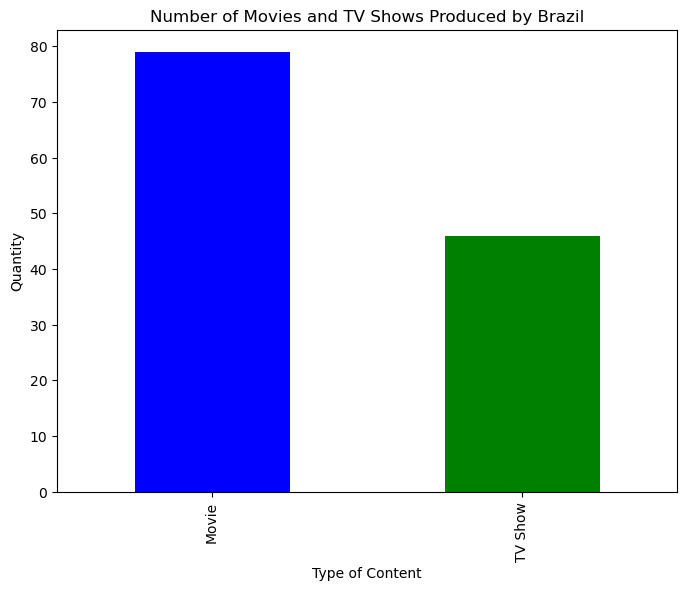

<Figure size 640x480 with 0 Axes>

In [17]:
type_count = brazil_split['type'].value_counts()

plt.figure(figsize=(8, 6))
type_count.plot(kind='bar', color=['blue', 'green'])
plt.title('Number of Movies and TV Shows Produced by Brazil')
plt.xlabel('Type of Content')
plt.ylabel('Quantity')

plt.show()
plt.clf()


The chart above highlights that the majority of content generated by Brazil comprises movies, with TV shows representing a minority. 

By focusing primarily on movies, Brazil seems to cater to a broader audience, but it's essential to delve deeper into the specific categories within these content types for a more comprehensive understanding.

### RQ 2:

#### What is the progression of Brazilian content production over time?

To answer this question, I opted for a line chart, allowing us to observe the progression of content production for each type over the years.


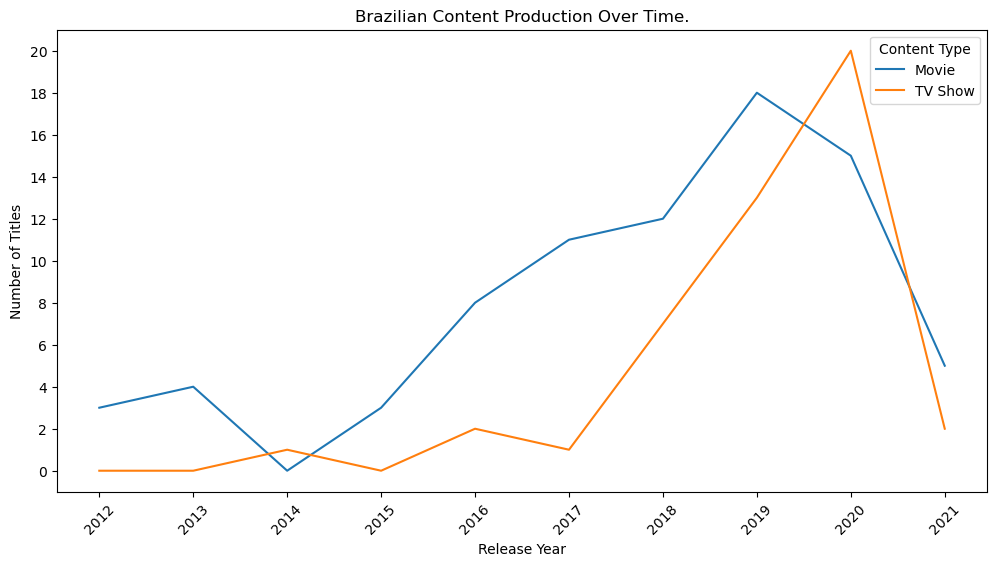

<Figure size 640x480 with 0 Axes>

In [18]:
brazil_type = brazil_split.groupby(['release_year','type']).size().unstack(fill_value=0)

brazil_type.plot(kind='line', figsize=(12,6))
plt.title('Brazilian Content Production Over Time.')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Content Type')
plt.xticks(range(2012,2022), rotation=45)
plt.yticks(range(0,21,2))

plt.show()
plt.clf()

Upon closer examination of the graph, it becomes clear that there was a significant surge in TV show production starting in 2017, to the point where it surpassed movie production in 2020. However, the arrival of the coronavirus pandemic resulted in a sharp decline in both categories. This indicates that external factors, such as the pandemic, can influence the production landscape of the entertainment industry, leading to fluctuating trends over time.

### RQ 3:

#### What kind of movies has Brazil produced the most?

To address this and the subsequent questions, I've generated two new datasets: 'brazil_movies' and 'brazil_tv_shows'. Each dataset contains a unique 'type' corresponding to its name.

In [19]:
brazil_movies = brazil_split.query('type == "Movie"')
brazil_tv_shows = brazil_split.query('type == "TV Show"')

In the next step, I applied the `value_counts()` method to the 'listed_in' column and visualized the results with a bar chart for enhanced clarity.

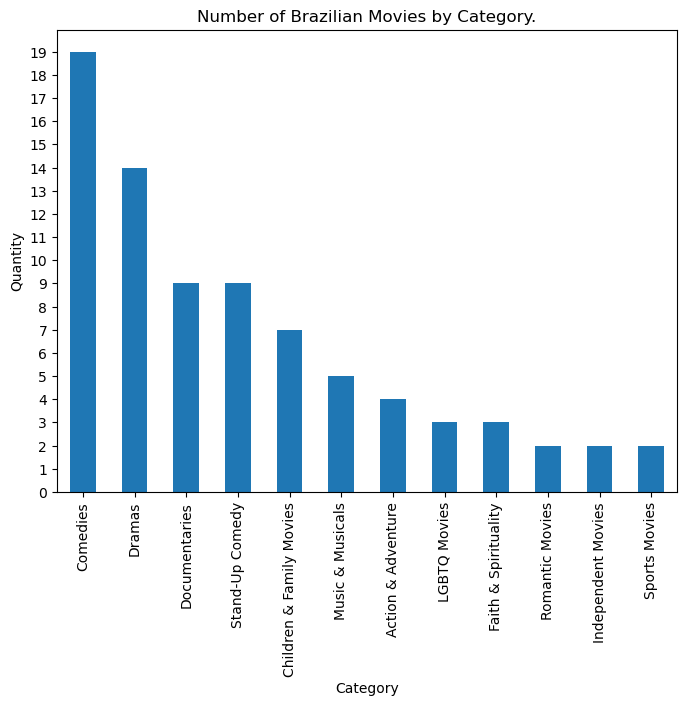

<Figure size 640x480 with 0 Axes>

In [31]:
movies_count = brazil_movies['listed_in'].value_counts()

plt.figure(figsize=(8, 6))
movies_count.plot(kind='bar')
plt.title('Number of Brazilian Movies by Category.')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.yticks(range(0,20))


plt.show()
plt.clf()


The majority of Brazilian film content production consists of Comedies, followed by Drama, Documentaries, Stand-up Comedies, and Family-friendly films.

### RQ 4

#### What is the progression of Brazilian movie production over time?

Given the extensive range of categories, I will apply a filter to include only **the top 5 categories** from the previous response. This will help maintain clarity in the chart.

In [21]:
top_categories_movies = ['Dramas','Comedies','Documentaries','Stand-Up Comedy','Children & Family Movies']

top_movies =  brazil_movies[brazil_movies['listed_in'].isin(top_categories_movies)]

To visualize the content production trends over time, I have chosen to use a line chart once more.

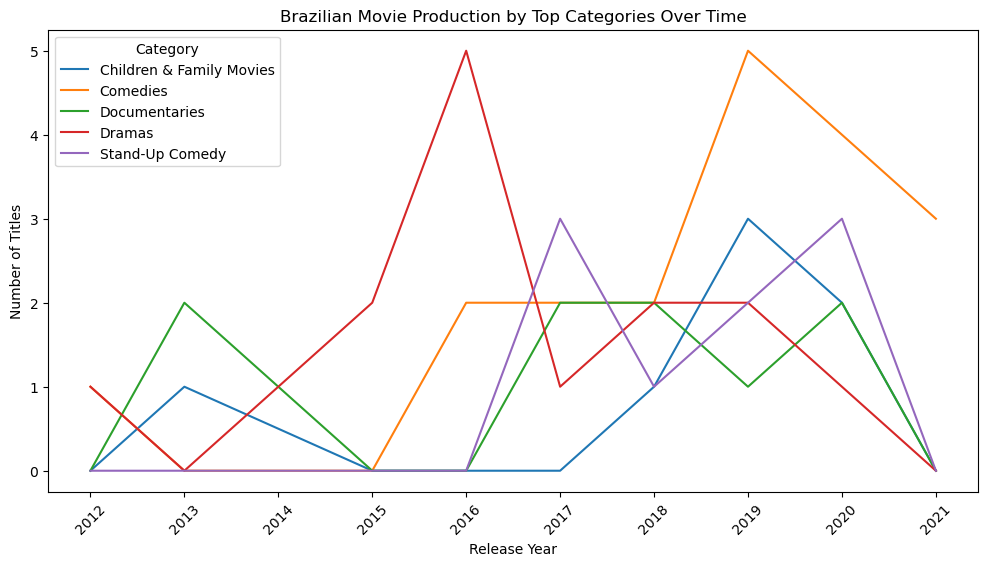

<Figure size 640x480 with 0 Axes>

In [22]:
movies_grouped = top_movies.groupby(['release_year','listed_in']).size().unstack(fill_value=0)

movies_grouped.plot(kind='line', figsize=(12,6))
plt.title('Brazilian Movie Production by Top Categories Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Category')
plt.xticks(range(2012,2022), rotation=45)

plt.show()
plt.clf()


It's noticeable that Drama production reached its zenith in 2016, only to experience a significant downturn in the following years. Conversely, Comedy, Children & Family Movies, and Stand-Up Comedies appeared to be on a steady upward trajectory but faced disruptions in production due to the coronavirus pandemic. Meanwhile, Documentaries maintain a fluctuating production pattern, marked by occasional spikes and dips in releases.

### RQ 5

#### What kind of TV Shows has Brazil produced the most?

To answer this question, I applied the `value_counts()` method to the 'listed_in' column and visualized the results with a bar chart for enhanced clarity.


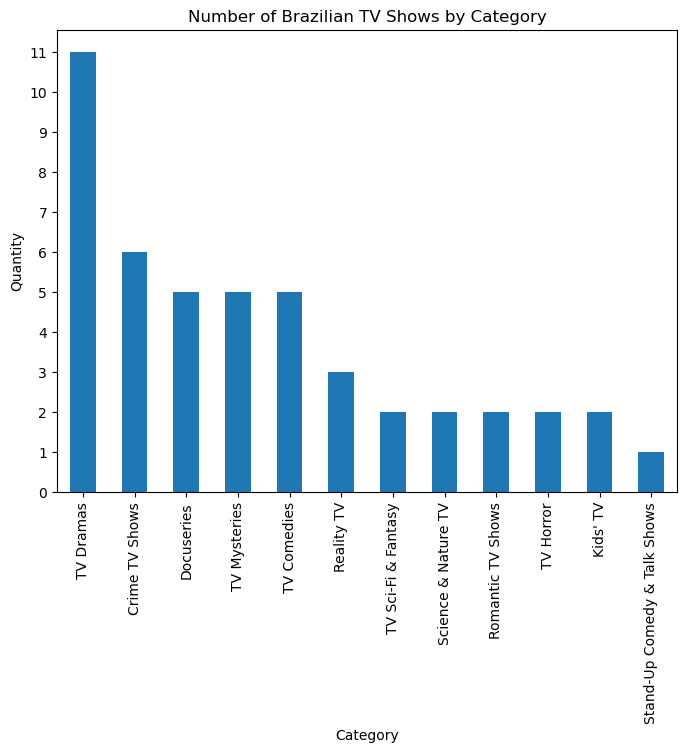

<Figure size 640x480 with 0 Axes>

In [34]:
shows_count = brazil_tv_shows['listed_in'].value_counts()

plt.figure(figsize=(8, 6))
shows_count.plot(kind='bar')
plt.title('Number of Brazilian TV Shows by Category')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.yticks(range(0,12))

plt.show()
plt.clf()


Unlike the movie production landscape, TV shows in Brazil were predominantly dominated by drama series, with comedies ranking fifth in terms of production quantity. The shift in production focus between movies and TV shows suggests varying audience preferences and viewing habits within the Brazilian entertainment landscape.

### RQ 6

#### What is the progression of Brazilian TV shows production over time?

Given the extensive range of categories, I will follow the same approach as we did with movies and apply a filter to include only **the top 5 categories** from the previous response. This will enhance the clarity of the chart.



In [24]:
top_categories_shows = ['TV Dramas', 'Crime TV Shows', 'Docuseries','TV Mysteries','TV Comedies']

top_shows = brazil_tv_shows[brazil_tv_shows['listed_in'].isin(top_categories_shows)]

To visualize the content production trends over time, I have chosen to use a line chart once more.

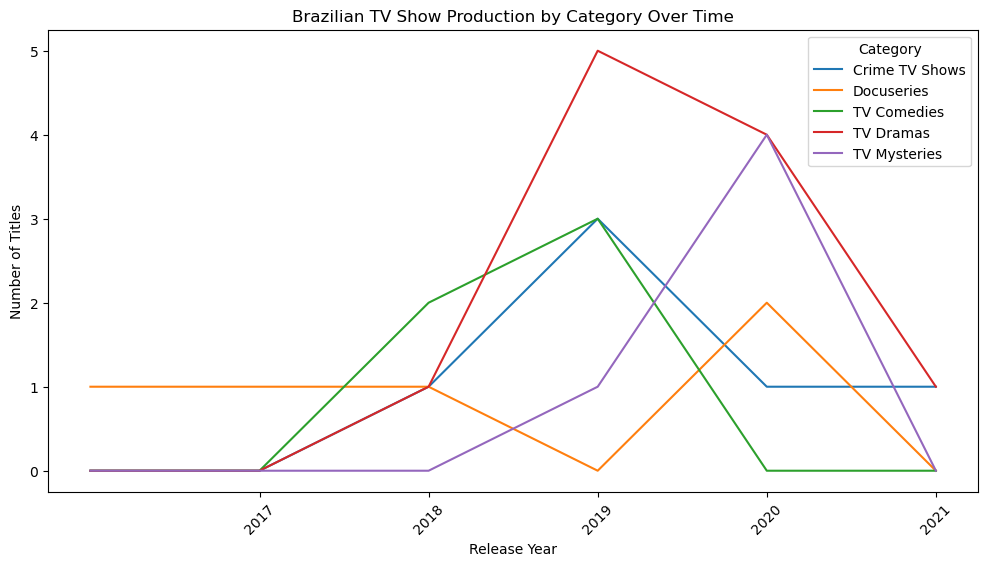

<Figure size 640x480 with 0 Axes>

In [25]:
shows_grouped = top_shows.groupby(['release_year','listed_in']).size().unstack(fill_value=0)

shows_grouped.plot(kind='line', figsize=(12,6))
plt.title('Brazilian TV Show Production by Category Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Category')
plt.xticks(range(2017,2022), rotation=45)

plt.show()
plt.clf()

Brazilian Drama TV shows reached their peak in 2019, while Mystery series and Docuseries began to gain prominence from that same year onward. At the same time, there was a sharp decline in the production of Crime TV shows and Comedy series. All of these genres experienced significant decreases during the pandemic period, reflecting shifts in audience preferences and industry dynamics.

### RQ 7

#### Which age rating (content rating) has Brazil focused on the most?

After gaining insights from the previous answers, to understand the age rating of Brazilian content, I applied the `value_counts()` method, and chose a simple bar chart.

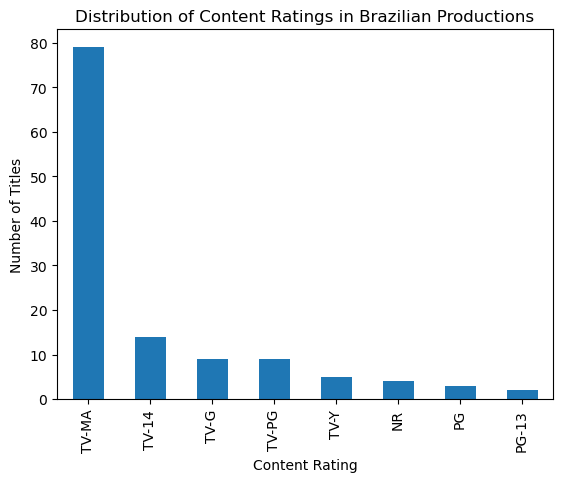

In [26]:
rating_counts = brazil_split['rating'].value_counts()

rating_counts.plot(kind='bar')
plt.title('Distribution of Content Ratings in Brazilian Productions')
plt.xlabel('Content Rating')
plt.ylabel('Number of Titles')
plt.show()


The data clearly indicates that a significant portion of Brazilian content falls under the 'TV-MA' rating, which stands for 'Mature Audience.' This rating implies that the content may contain strong language, explicit sexual content, or graphic violence, making it suitable for mature audiences. While this rating dominates, it suggests that Brazilian productions tend to cater more to an adult demographic, possibly exploring mature themes and storytelling.

### RQ 8

#### Is there a relationship between the release year and content rating?

Building upon the insights from the previous response, I chose to visualize the quantity of content production over time based on age ratings using a Crosstab chart.

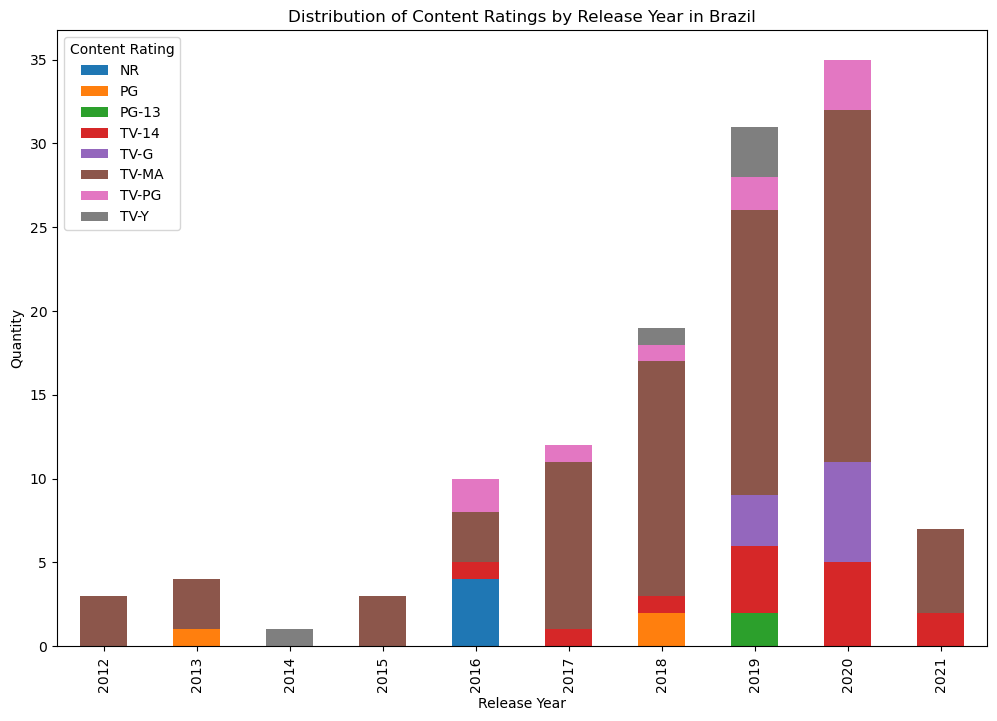

In [27]:
content_rating = pd.crosstab(brazil_split['release_year'], brazil_split['rating'])

content_rating.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Release Year')
plt.ylabel('Quantity')
plt.title('Distribution of Content Ratings by Release Year in Brazil')

plt.legend(title='Content Rating')
plt.show()


The bar chart clearly illustrates that content targeting mature audiences (TV-MA) dominates the Brazilian Netflix production landscape. This trend has been on the rise over the years, reflecting a preference for content with more mature themes and subject matter.

On the other hand, content ratings like TV-PG (Parental Guidance) and TV-G (General Audience) have also seen an increase in production, indicating a growing focus on family-friendly and youth-oriented content. This diversification of content ratings suggests that Netflix Brazil is catering to a broader audience, from adults to children and families, offering a wide range of choices to its subscribers.

### RQ 9

#### Is there a relationship between the release year and the duration of a movie?

To answer this question, I chose to create a scatter plot. This scatter plot allows us to visualize the trend in movie durations over the years.

/var/folders/l0/grx7fmx51kx9h6jq07pccfrw0000gn/T/ipykernel_8254/1531618478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_duration.loc[:, 'duration'] = pd.to_numeric(movies_duration['duration'].str.replace(' min', ''), errors='coerce')
/var/folders/l0/grx7fmx51kx9h6jq07pccfrw0000gn/T/ipykernel_8254/1531618478.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  movies_duration.loc[:, 'duration'] = pd.to_numeric(movies_duration['duration'].str.replace(' min', ''), errors='coerce')


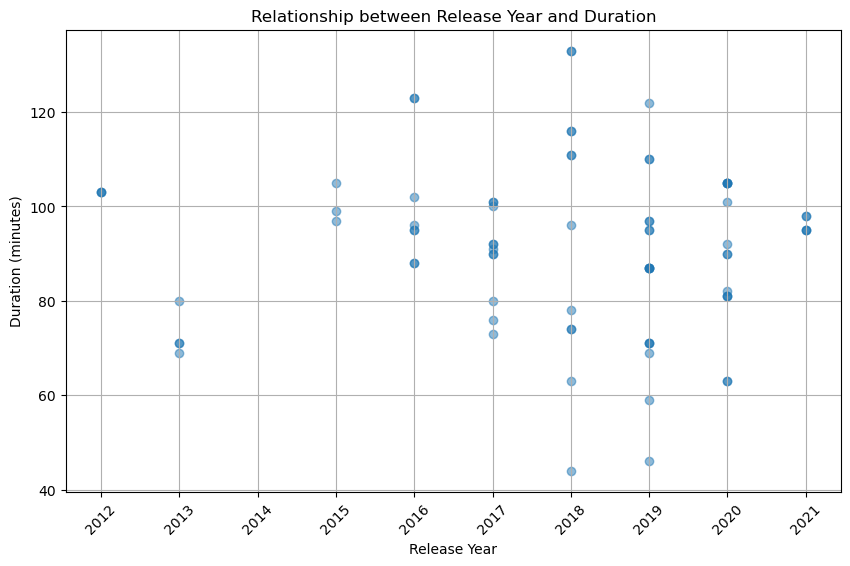

<Figure size 640x480 with 0 Axes>

In [28]:
movies_duration = brazil_movies[['release_year','duration']]

movies_duration.loc[:, 'duration'] = pd.to_numeric(movies_duration['duration'].str.replace(' min', ''), errors='coerce')

plt.figure(figsize=(10, 6))
plt.scatter(movies_duration['release_year'], movies_duration['duration'], alpha=0.5)
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.title('Relationship between Release Year and Duration')
plt.xticks(range(2012, 2022), rotation=45)
plt.grid(True)

plt.show()
plt.clf()


This observation suggests that there isn't a clear trend of movies becoming significantly longer or shorter over the years. While there are exceptions, the majority of Brazilian films produced for Netflix appear to maintain a relatively consistent duration range. Filmmakers may choose these durations based on the demands of their storytelling rather than following a specific trend, resulting in a diverse landscape of film lengths in the Brazilian content catalog.

### RQ 10
 
#### Do Brazilian TV shows tend to get renewed?

To address the final question, I employed a bar chart to provide a clear representation of the number of seasons.

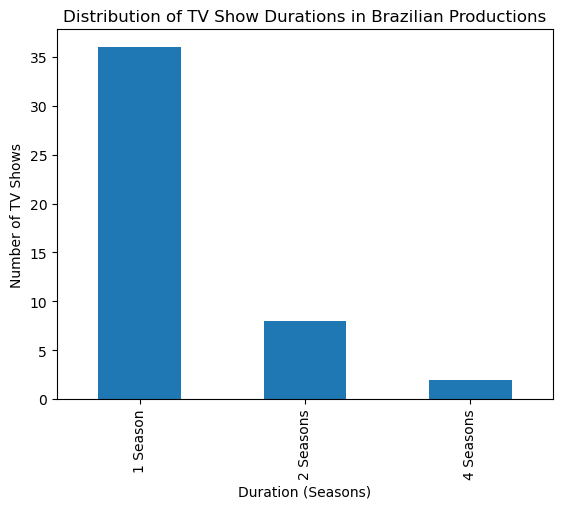

<Figure size 640x480 with 0 Axes>

In [29]:
series_duration = brazil_tv_shows['duration'].value_counts()

series_duration.plot(kind='bar')
plt.title('Distribution of TV Show Durations in Brazilian Productions')
plt.xlabel('Duration (Seasons)')
plt.ylabel('Number of TV Shows')
plt.show()
plt.clf()


This insight into the distribution of TV show seasons provides valuable information about the typical lifecycle of Brazilian TV shows on Netflix. It appears that many of them are limited to a single season, possibly due to various factors such as audience reception, production costs, or storyline considerations. On the other hand, the smaller but still notable fraction of shows with multiple seasons suggests that some Brazilian TV series have found sustained success and an enduring audience. Further analysis and exploration could delve deeper into the reasons behind these patterns and what they mean for the Brazilian content landscape on Netflix.

## Conclusions 

**Results of the EDA** 

Based on the analysis of the Netflix-Shows dataset, we can draw several conclusions:

1. **Content Production Shift:** There has been a notable shift in content production in Brazil, with TV shows gaining prominence in recent years, especially after 2017, surpassing the production of movies by 2020. However, both TV shows and movies faced a decline in production during the COVID-19 pandemic.

2. **Genre Preferences:** In terms of content genre, Brazilian movies are predominantly composed of comedies, followed by dramas, documentaries, stand-up comedies, and family-oriented movies. On the other hand, TV shows are primarily composed of drama series, with comedies ranking lower in production.

3. **Yearly Variations:** Production trends vary from year to year. For instance, drama production peaked in 2016 but declined afterward. Meanwhile, comedy, children & family movies, and stand-up comedies were on the rise until the pandemic disrupted their production. Documentaries, while inconsistent, experienced occasional spikes in releases.

4. **Content Rating:** The majority of Brazilian content on Netflix is rated 'TV-MA,' indicating content geared towards adult audiences. However, there's a growing presence of content for younger audiences ('TV-PG' and 'TV-Y7') over the years, suggesting a diversified content portfolio.

5. **Season Duration:** Most Brazilian TV shows tend to have only one season, with fewer continuing into a second season or beyond. The majority of TV shows conclude after their first season.

These conclusions provide insights into the evolution of Brazilian content on Netflix, its genre preferences, and how production patterns have been influenced by factors like the COVID-19 pandemic. These insights can be valuable for content creators and industry professionals looking to understand trends in Brazilian content production for streaming platforms.